<a href="https://colab.research.google.com/github/Sabya-J/Econ211_Pset2_sj288/blob/main/PurchasingPower_decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Data Wrangling

In [104]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics 
clf = DecisionTreeClassifier()

In [105]:
###show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [106]:
df=pd.read_csv('https://raw.githubusercontent.com/Sabya-J/Econ211_decisiontree_sj288/main/QualityOfLife2020.csv')
df.head()

,Rank,City,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,1,"Canberra, Australia",213.79,117.59,80.68,81.95,75.16,5.08,23.70,14.23,82.72
1,2,"Raleigh, NC, United States",210.54,145.30,68.11,75.66,69.80,2.73,32.41,20.90,83.88
2,3,"Adelaide, Australia",210.18,116.12,71.31,80.19,68.40,4.05,23.58,19.46,94.96
3,4,"Wellington, New Zealand",205.06,106.71,71.39,74.84,70.47,6.06,27.68,13.30,97.68
4,5,"Columbus, OH, United States",200.44,142.17,58.21,73.46,70.50,1.89,25.98,25.13,71.29


In [107]:
df['Return']=pd.qcut(df['Property Price to Income Ratio'],4, labels=np.arange(1,5,1) )
# print(df[['Property Price to Income Ratio','Return']])

In [108]:
df['Rank']=df['Return'].apply(lambda x: 'Very High' if x==4 else 'High' if x==3 else 'Low' if x==2 else 'Very Low')

# print(df[['Property Price to Income Ratio','Return','Rank']])

# Build Decision Tree

In [109]:
feature_names=['Purchasing Power Index']
features=df[feature_names]
targets=df['Rank']
targets_names = targets.unique()

In [110]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size=0.2, random_state=42)

In [111]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

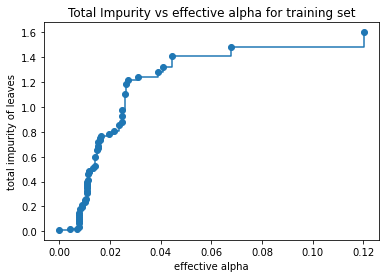

In [112]:

clf = DecisionTreeClassifier(criterion='entropy', random_state=0)

path = clf.cost_complexity_pruning_path(train_features, train_targets)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")


In [113]:
#####Optimizing Decision Tree Performance

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(train_features,train_targets)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3980974303184568


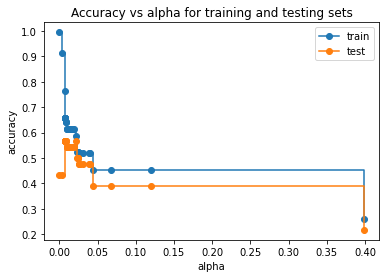

In [114]:
train_scores = [clf.score(train_features,train_targets) for clf in clfs]
test_scores = [clf.score(test_features,test_targets) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()


In [115]:

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', ccp_alpha= 0.05,random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(train_features,train_targets)

#Predict the response for test dataset
y_pred = clf.predict(test_features)

# Compute test set accuracy  
acc = accuracy_score(y_pred, test_targets)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.59


In [119]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

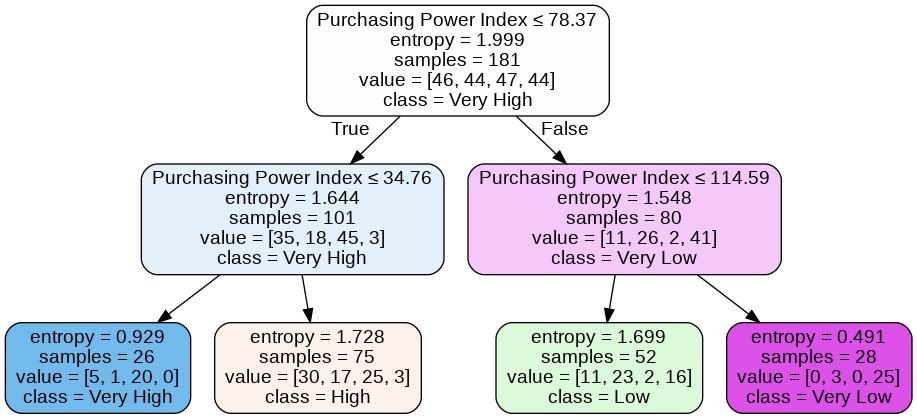

In [120]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=clf.classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('G.png')
Image(graph.create_png())
